In [41]:
import torch.nn as nn 
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [42]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


In [43]:
x = np.array([x for x in range(100)])

# Converting the raw numbers in to features (column = 100, rows =  1)

print(x)

x_reshaped = x.reshape(-1,1)

print(x_reshaped)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]]


In [44]:
y = 10 + 2 * x_reshaped

print(y)

[[ 10]
 [ 12]
 [ 14]
 [ 16]
 [ 18]
 [ 20]
 [ 22]
 [ 24]
 [ 26]
 [ 28]
 [ 30]
 [ 32]
 [ 34]
 [ 36]
 [ 38]
 [ 40]
 [ 42]
 [ 44]
 [ 46]
 [ 48]
 [ 50]
 [ 52]
 [ 54]
 [ 56]
 [ 58]
 [ 60]
 [ 62]
 [ 64]
 [ 66]
 [ 68]
 [ 70]
 [ 72]
 [ 74]
 [ 76]
 [ 78]
 [ 80]
 [ 82]
 [ 84]
 [ 86]
 [ 88]
 [ 90]
 [ 92]
 [ 94]
 [ 96]
 [ 98]
 [100]
 [102]
 [104]
 [106]
 [108]
 [110]
 [112]
 [114]
 [116]
 [118]
 [120]
 [122]
 [124]
 [126]
 [128]
 [130]
 [132]
 [134]
 [136]
 [138]
 [140]
 [142]
 [144]
 [146]
 [148]
 [150]
 [152]
 [154]
 [156]
 [158]
 [160]
 [162]
 [164]
 [166]
 [168]
 [170]
 [172]
 [174]
 [176]
 [178]
 [180]
 [182]
 [184]
 [186]
 [188]
 [190]
 [192]
 [194]
 [196]
 [198]
 [200]
 [202]
 [204]
 [206]
 [208]]


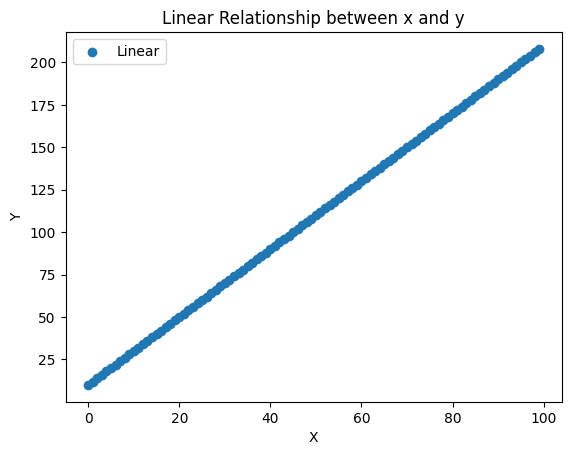

In [45]:
# Visualizing weather the relationship between the two data is linear or not

plt.scatter(x,y, label="Linear")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Relationship between x and y")
plt.legend()
plt.show()


In [46]:
normalized_x = (x_reshaped - x_reshaped.mean()) / x_reshaped.std()
x_tensor = torch.tensor(normalized_x,dtype=torch.float32)


normalized_y = (y - y.mean()) / y.std()
y_tensor = torch.tensor(normalized_y, dtype=torch.float32)


x_tensor

tensor([[-1.7148],
        [-1.6802],
        [-1.6455],
        [-1.6109],
        [-1.5762],
        [-1.5416],
        [-1.5070],
        [-1.4723],
        [-1.4377],
        [-1.4030],
        [-1.3684],
        [-1.3337],
        [-1.2991],
        [-1.2645],
        [-1.2298],
        [-1.1952],
        [-1.1605],
        [-1.1259],
        [-1.0912],
        [-1.0566],
        [-1.0220],
        [-0.9873],
        [-0.9527],
        [-0.9180],
        [-0.8834],
        [-0.8487],
        [-0.8141],
        [-0.7795],
        [-0.7448],
        [-0.7102],
        [-0.6755],
        [-0.6409],
        [-0.6062],
        [-0.5716],
        [-0.5370],
        [-0.5023],
        [-0.4677],
        [-0.4330],
        [-0.3984],
        [-0.3637],
        [-0.3291],
        [-0.2945],
        [-0.2598],
        [-0.2252],
        [-0.1905],
        [-0.1559],
        [-0.1212],
        [-0.0866],
        [-0.0520],
        [-0.0173],
        [ 0.0173],
        [ 0.0520],
        [ 0.

In [47]:
y_tensor

tensor([[-1.7148],
        [-1.6802],
        [-1.6455],
        [-1.6109],
        [-1.5762],
        [-1.5416],
        [-1.5070],
        [-1.4723],
        [-1.4377],
        [-1.4030],
        [-1.3684],
        [-1.3337],
        [-1.2991],
        [-1.2645],
        [-1.2298],
        [-1.1952],
        [-1.1605],
        [-1.1259],
        [-1.0912],
        [-1.0566],
        [-1.0220],
        [-0.9873],
        [-0.9527],
        [-0.9180],
        [-0.8834],
        [-0.8487],
        [-0.8141],
        [-0.7795],
        [-0.7448],
        [-0.7102],
        [-0.6755],
        [-0.6409],
        [-0.6062],
        [-0.5716],
        [-0.5370],
        [-0.5023],
        [-0.4677],
        [-0.4330],
        [-0.3984],
        [-0.3637],
        [-0.3291],
        [-0.2945],
        [-0.2598],
        [-0.2252],
        [-0.1905],
        [-0.1559],
        [-0.1212],
        [-0.0866],
        [-0.0520],
        [-0.0173],
        [ 0.0173],
        [ 0.0520],
        [ 0.

In [48]:
x_tensor.shape

torch.Size([100, 1])

In [49]:
print(x_tensor.shape)
print(y_tensor.shape)


torch.Size([100, 1])
torch.Size([100, 1])


In [51]:
# Welp the relation is indeed linear ofc a + bx is magic (not really lot of math behind it [not lot])

class LinearRegression(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.linear = nn.Linear(input, output)
    
    def forward(self, x):
        return self.linear(x)
    


input = 1
output = 1

model = LinearRegression(input, output).to(device)
x_tensor = x_tensor.to(device)
y_tensor = y_tensor.to(device)


criterion = nn.MSELoss()


optimizer = optim.SGD(model.parameters(), lr=0.1)

epoch = 1000

for i in range(epoch):

    output = model(x_tensor)
    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
       print(f"Epoch {i}, Loss: {loss.item()}")




Epoch 0, Loss: 1.7886968851089478
Epoch 100, Loss: 1.4825986982157022e-14
Epoch 200, Loss: 1.4825986982157022e-14
Epoch 300, Loss: 1.4825986982157022e-14
Epoch 400, Loss: 1.4825986982157022e-14
Epoch 500, Loss: 1.4825986982157022e-14
Epoch 600, Loss: 1.4825986982157022e-14
Epoch 700, Loss: 1.4825986982157022e-14
Epoch 800, Loss: 1.4825986982157022e-14
Epoch 900, Loss: 1.4825986982157022e-14


In [52]:
print(model.linear.weight.item())
print(model.linear.bias.item())


0.9999998807907104
-3.61682572780353e-10
